In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
seed = 0
np.random.seed(seed)

## Load  and rapid preview data


In [2]:
path_data = 'churn/'
df =pd.read_csv(path_data+'dataset-churn.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Missing value detection

In [3]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA
miss = assess_NA(df)
miss

,Number of NA,Percent NA


## Change type of some columns and handling mixed types in a columns TotalCharges

In [4]:
# set customerID as string
def changeTypeCol(df):
    """
    Change type of some columns
    Parameters
    ----------
    df:DataFrame
    """
    df['customerID'] = df['customerID'].astype('str')
    # set some columns to categorical
    df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
    df['gender'] = df['gender'].astype('category')
    df['Partner'] = df['Partner'].astype('category')
    df['Dependents'] = df['Dependents'].astype('category')
    df['PhoneService'] = df['PhoneService'].astype('category')
    df['MultipleLines'] = df['MultipleLines'].astype('category')
    df['InternetService'] = df['InternetService'].astype('category')
    df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
    df['OnlineBackup'] = df['OnlineBackup'].astype('category')
    df['DeviceProtection'] = df['DeviceProtection'].astype('category')
    df['TechSupport'] = df['TechSupport'].astype('category')
    df['StreamingTV'] = df['StreamingTV'].astype('category')
    df['StreamingMovies'] = df['StreamingMovies'].astype('category')
    df['Contract'] = df['Contract'].astype('category')
    df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
    df['PaymentMethod'] = df['PaymentMethod'].astype('category')
    df['Churn'] = df['Churn'].astype('category')
    #df['TotalCharges'] = df['TotalCharges'].astype('float64')
    return df

df = changeTypeCol(df)

#handling mixed types of elements in a columns TotalCharges
df["TotalCharges"] = df["TotalCharges"].convert_objects(convert_numeric=True).fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null catego

## Check Duplicates Data

In [5]:
def check_dupli_data(df):
    """
     check duplicated data in a DataFrame
     parameters:
     ----------
     df: DataFrame
    """
    # check duplicated data
    if len(df[df.duplicated()]) > 0:
        print("len of duplicated entries: ", len(df[df.duplicated()]))
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
        # drop duplicates data
        return df.drop_duplicates(inplace = True)
    else:
        print("No duplicated entries found")
        return df
df = check_dupli_data(df)

No duplicated entries found


## Distribution of categorical data
This step is important to have an ideas about the unique values of each categorical data.

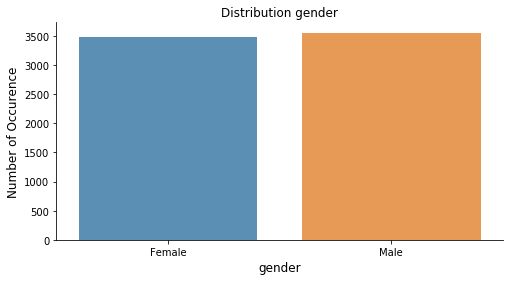

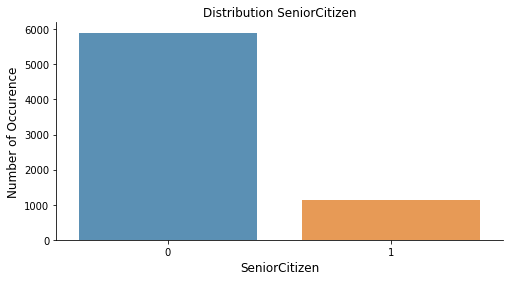

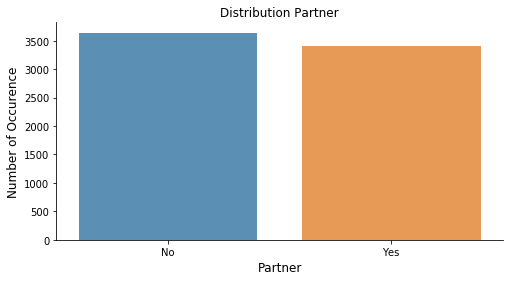

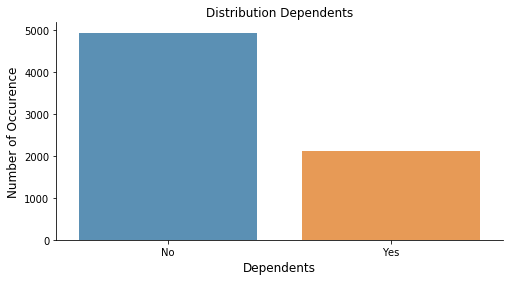

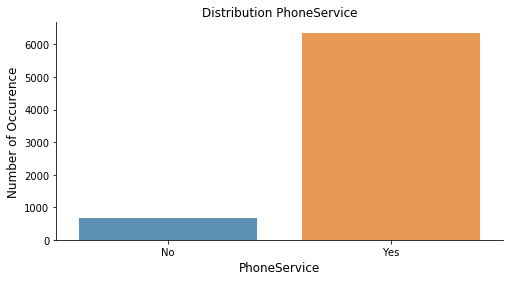

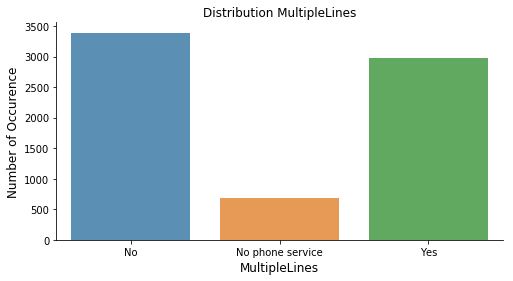

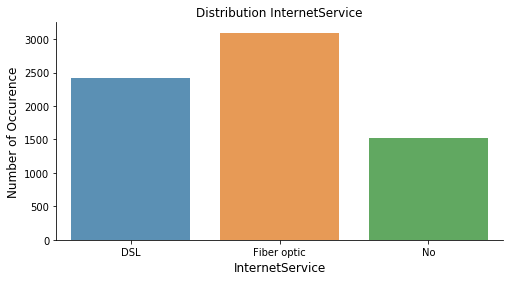

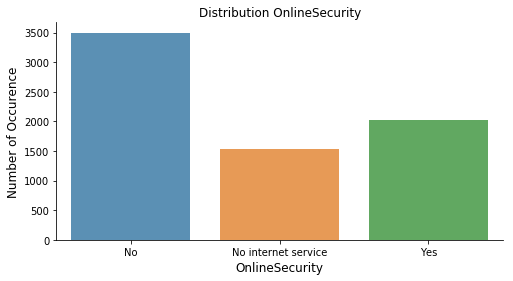

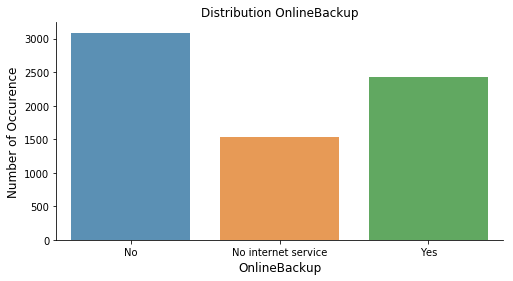

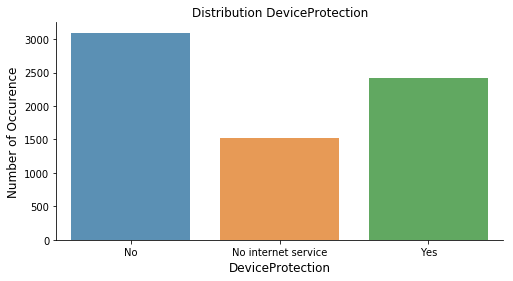

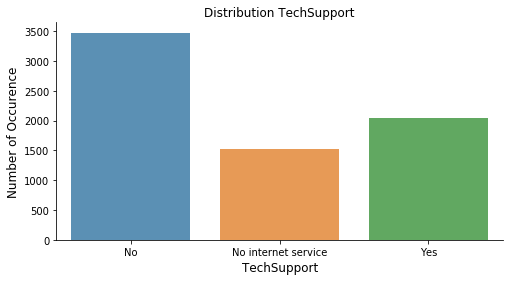

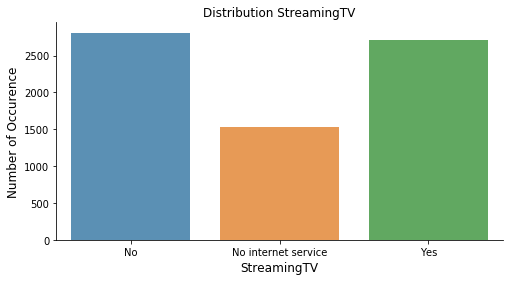

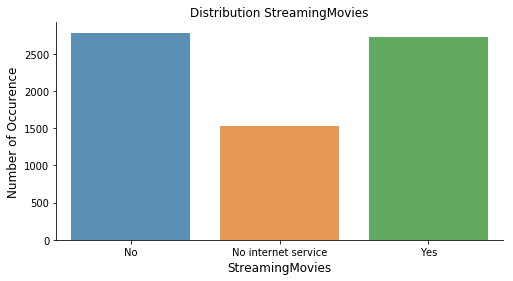

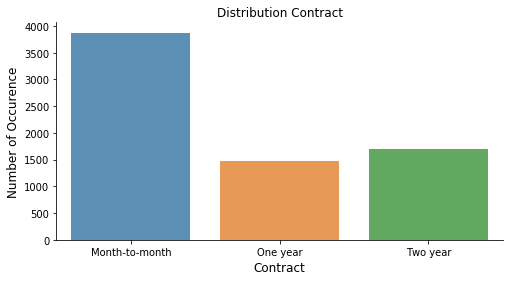

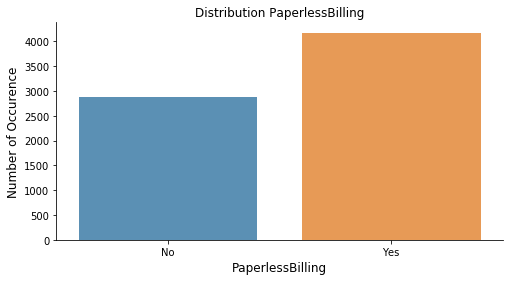

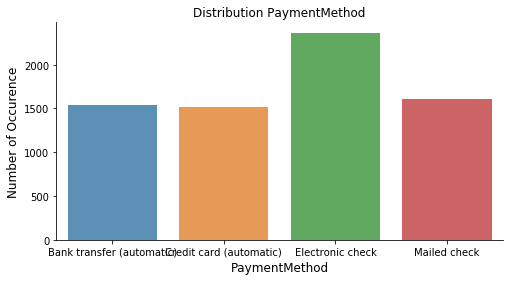

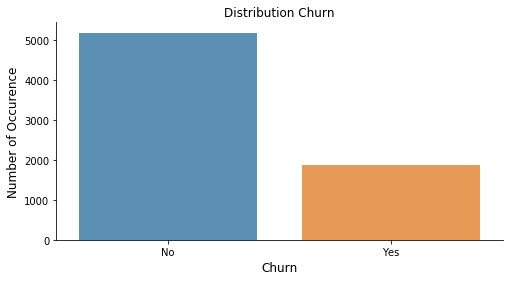

In [6]:
def dist_cat(df, col):
    """
    plot the distribution of categorical data 
    Parameters:
    -----------
    df:Dataframe
    col: the columns to plot in a DataFrame
    """
    plt.figure(figsize=(8,4))
    
    count  = df.value_counts()
    
    g = sns.barplot(count.index, count.values, alpha=0.8)

    plt.title('Distribution '+col) 
    plt.ylabel("Number of Occurence", fontsize=12)
    plt.xlabel(col, fontsize=12)
    sns.despine()
    
cat = [dist_cat(df[col], col) for col in df.select_dtypes(include='category').columns]


## Key point
* The number of women/men and Parntner/no Partner are very well distributed
* Some columns (Contract, StreamingTV, TechSupport, DeviceProtections, OnlineBackup, InternetService, MultipleLines) have 3 unique values which should logically be 2 values Yes or No. So we will fix that after.
* users tend to pay by electronic check

## mapped data categorical 

In [7]:
#list of all categorical data
all_cat = list(df.select_dtypes(include='category').columns.values)

#list of bolean columns
bool_cat = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

# Yer or No to 0 or 1 
for c in bool_cat:
    df[c] = df[c].map({'Yes':1, 'No':0})

#fix the columns have 3 unique values instead 2 
df["MultipleLines"] = df["MultipleLines"].map({'Yes':1, 'No':0, 'No phone service':0})
df["OnlineSecurity"] = df["OnlineSecurity"].map({'No':0, 'No internet service':0,'Yes':1})
df["DeviceProtection"] = df["DeviceProtection"].map({'No':0, 'No internet service':0,'Yes':1})
df["TechSupport"] = df["TechSupport"].map({'No':0, 'No internet service':0,'Yes':1})
df["StreamingTV"] = df["StreamingTV"].map({'No':0, 'No internet service':0,'Yes':1})
df["StreamingMovies"] = df["StreamingMovies"].map({'No':0, 'No internet service':0,'Yes':1})
df["Contract"] = df["Contract"].map({'Month-to-month':0, 'One year':1,'Two year':2})
df["OnlineBackup"] = df["OnlineBackup"].map({'No':0, 'No internet service':0, 'Yes':1})

# mapped value gender columns to 0 or 1
df["gender"] = df["gender"].map({'Male':1, 'Female':0})

# mapped the other columns having unique values more that 2 
df["InternetService"] = df["InternetService"].map({'No':0, 'DSL':1, 'Fiber optic':2})
df["PaymentMethod"] = df["PaymentMethod"].map({'Electronic check':0, 'Mailed check':1, 
                                               'Bank transfer (automatic)':2,'Credit card (automatic)':3})

#save result in a csv file
df.to_csv(path_data+"dataset-churn-mapped.csv", index=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [8]:
# load data mapped
df = pd.read_csv(path_data+"dataset-churn-mapped.csv")

## relationship of categorical data to the target churn 

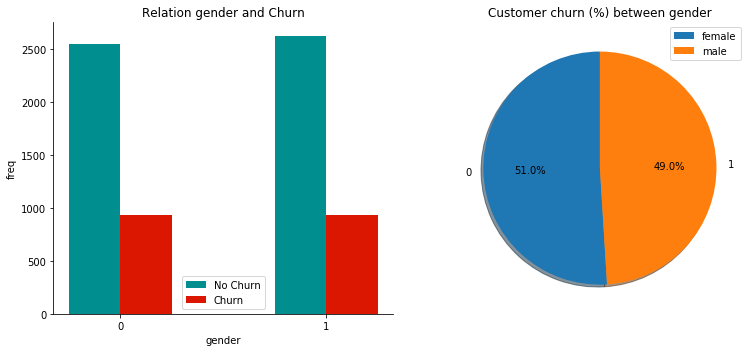

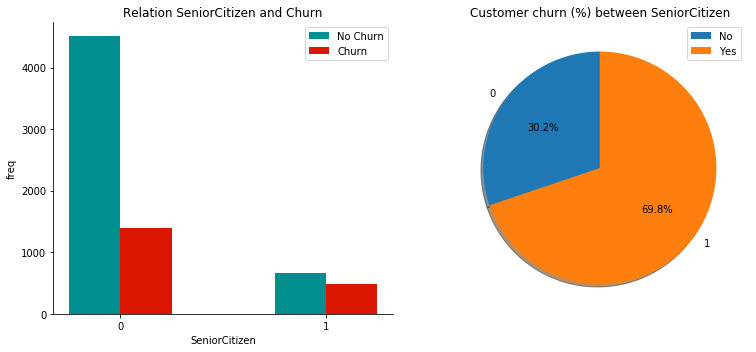

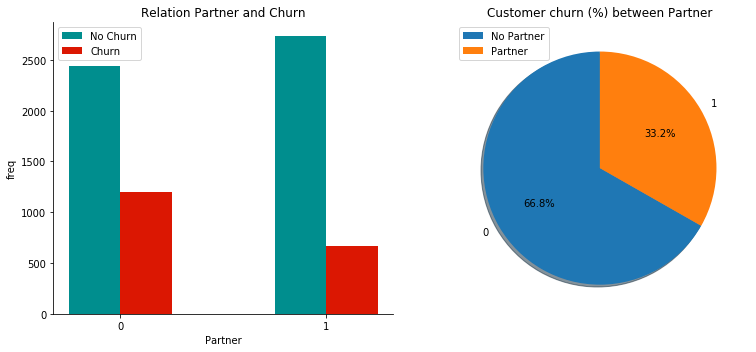

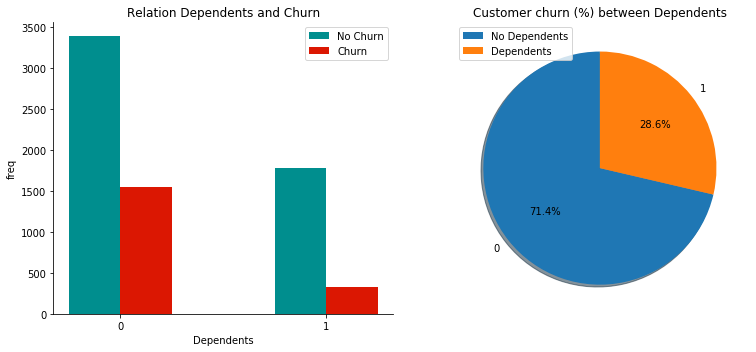

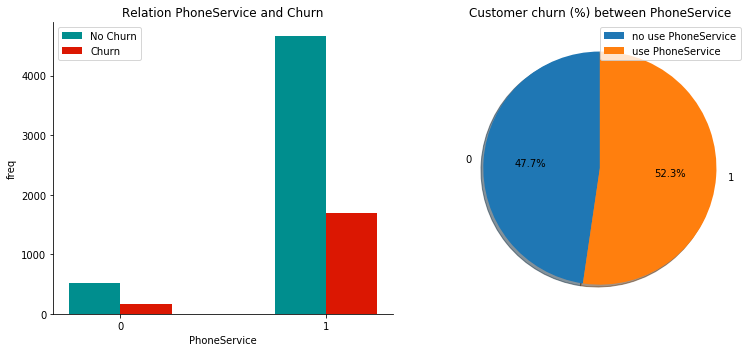

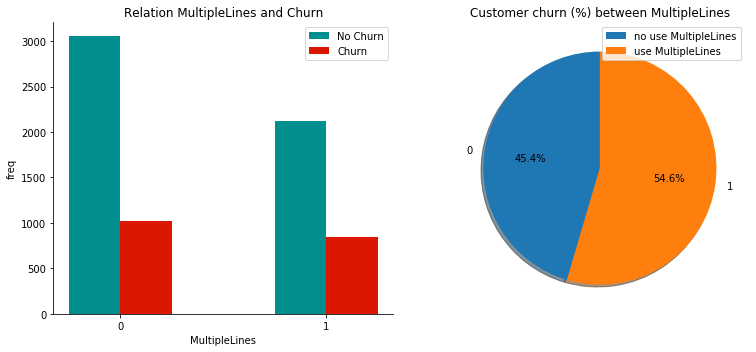

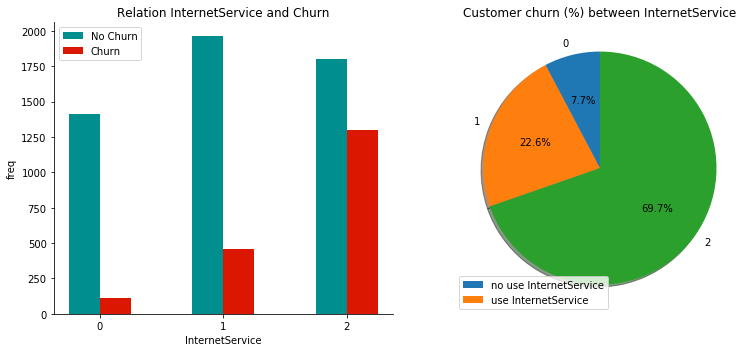

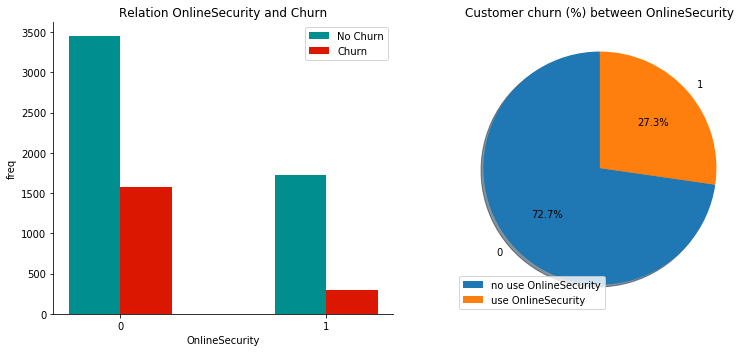

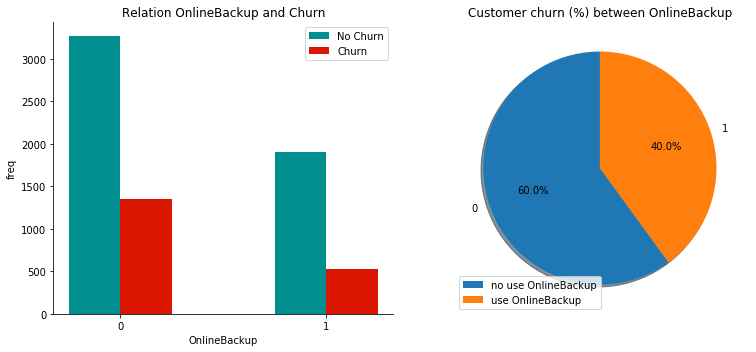

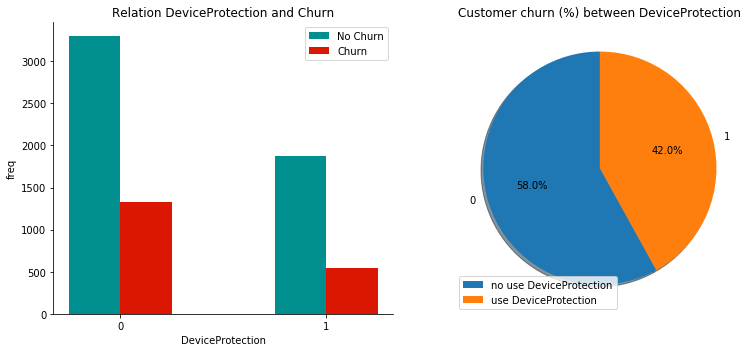

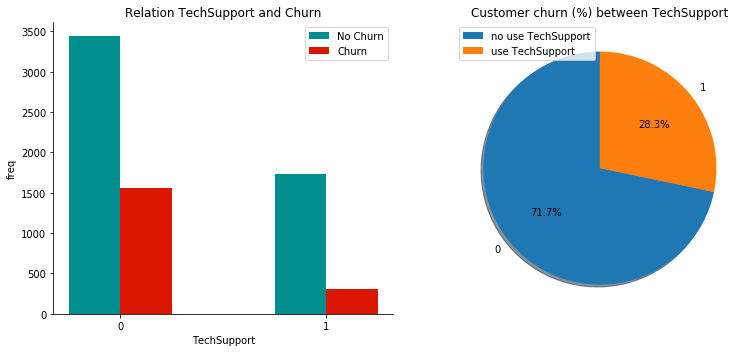

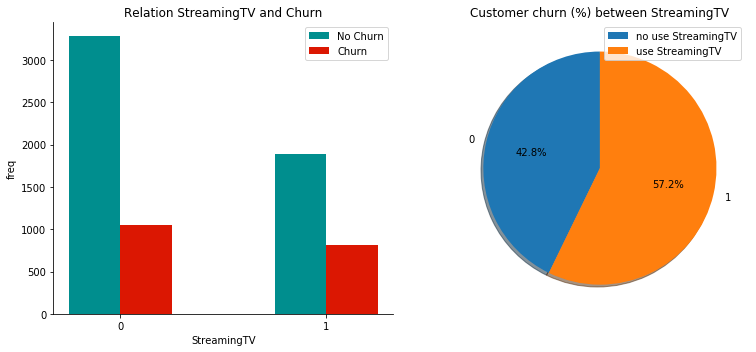

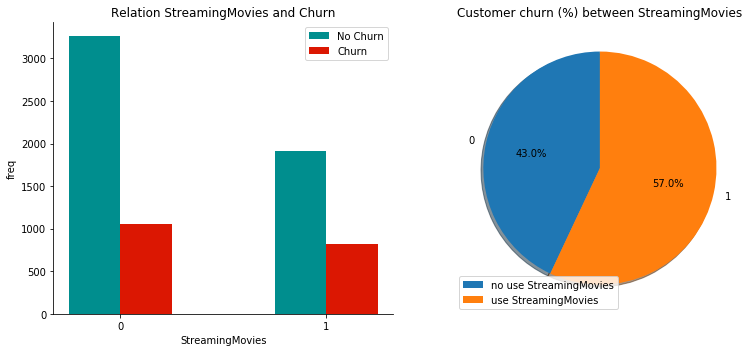

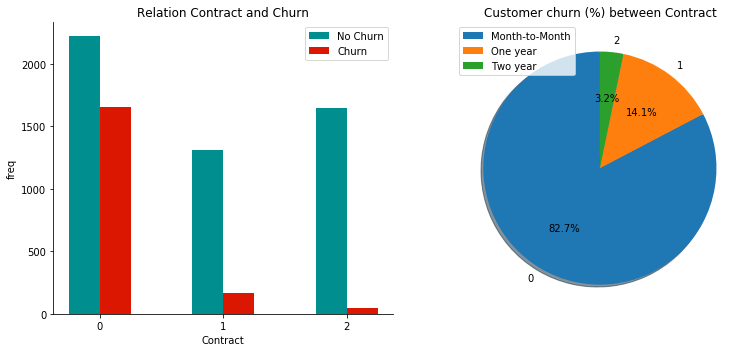

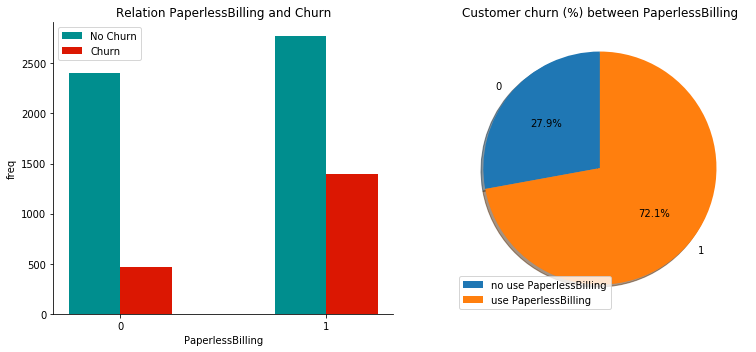

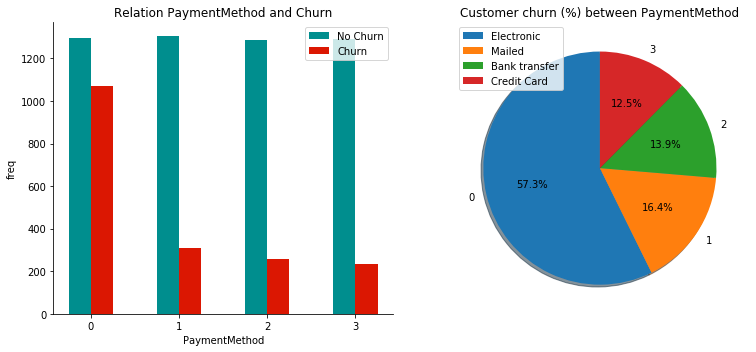

In [9]:
def pourcentDiff(distr_churn0, distr_churn1):
    """
    this function compute the percente churn for a given columns
    Parameters:
    -----------
    distr_churn0 = the value of the distribution no churn for given columns
    distr_churn1 = the value of the distribution churn for given columns
    """
    distr_churn1["percent"] = None
    distr_churn0["percent"] = None
    
    # put in columns percent the distrition value of churn
    for j in range(len(distr_churn0)):
        if (distr_churn1["Churn"][j] < distr_churn0["Churn"][j]):
            distr_churn1["percent"][j] = distr_churn0["percent"][j] = distr_churn1["Churn"][j]*100/distr_churn0["Churn"][j]
        else:
            distr_churn1["percent"][j] = distr_churn0["percent"][j] = distr_churn0["Churn"][j]*100/distr_churn1["Churn"][j]
    
    return distr_churn0, distr_churn1

def piechart(distr_churn0):
    """
    this function plot the pie chart for the percent churn for the given columns 
    Parameters:
    -----------
    distr_churn0: the value of the distribution no churn for given columns (DataFrame)
    """
    slices = distr_churn0["percent"].values
    classe = range(len(distr_churn0["percent"]))

    plt.pie(slices,
            labels=classe,
            startangle=90,
            shadow= True,
            autopct='%1.1f%%'
            )

#electronic check
def distr_bet_churn(df, col):
    """
    plot the distribution between the target churn
    Parameters:
    -----------
    df: DataFrame
    col: str
    """
    #select the df with target =  no churn
    df_no_churn = df.loc[df["Churn"]==0]
    
    #select the df with target = churn
    df_churn = df.loc[df["Churn"]==1]
    
    #group the dataframe per collumn and count the result
    distr_churn0 = df_no_churn[[col, "Churn"]].groupby(col).count()
    distr_churn1 = df_churn[[col, "Churn"]].groupby(col).count()
    
    #compute the percent of the churn data
    distr_churn0, distr_churn1 = pourcentDiff(distr_churn0, distr_churn1)
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    plt.tight_layout()
    
    # plot our bar chart in a 1er subplot
    plt.bar(distr_churn0["Churn"].index - 0.25/2, distr_churn0["Churn"].values, color = '#008E8E', width = 0.25)
    plt.bar(distr_churn0["Churn"].index + 0.25/2, distr_churn1["Churn"].values, color = '#DB1702', width = 0.25)
    plt.title("Relation "+col+" and Churn")
    plt.xlabel(col)
    plt.legend(["No Churn", "Churn"])
    plt.ylabel("freq")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(range(len(distr_churn0)))
    
    plt.subplot(122)
    # plot our pie chart in a 2th subplot
    plt.tight_layout()
    piechart(distr_churn0)
    plt.title("Customer churn (%) between "+col)
    
    if col=="PaymentMethod":
        plt.legend(["Electronic", "Mailed", "Bank transfer", "Credit Card"])
        
    elif col=="Contract":
        plt.legend(["Month-to-Month", "One year", "Two year"])
        
    elif col=="gender":
        plt.legend(["female", "male"])
        
    elif col=="SeniorCitizen":
        plt.legend(["No", "Yes"])
    elif col=="Partner" or col=="Dependents":
        plt.legend(["No "+col, col])
    
    else:
        plt.legend(["no use "+col, "use "+col])
    
    
list_cat = all_cat[:-1]

distr_ch = [distr_bet_churn(df, col) for col in list_cat]

## key point
* Customers with a Senior Citizen = yes are more likely to unsubscribe
* Operator partners / dependent customers have a lower churn percentage
* the customers that used the online security, online backup, device protection and technical support remain faithful to the operator
* the customers that used the service such as Multiple lines, phone service, Streamint TV/Movies and paperlessBiling has a hight probability of leaving.
* Compared to the contract, the probability of churn depends on its length, customers who have a contract month to month share more than those who has a long-term contract
* More than half of the people who uses the payment by Electronic Check churn

## Univariate plots (Numerical variable)

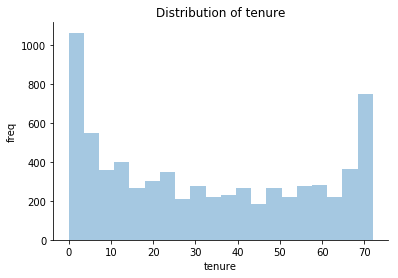

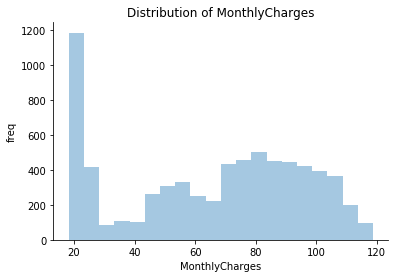

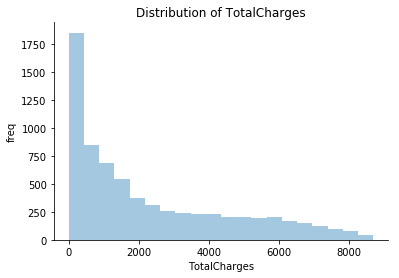

In [10]:
def dist_num(df, col):
    """
    this function is used for plotting the distribution of numerical variable
    Parameters:
    -----------
    df: DataFrame
    col: str
    """
    plt.figure()
    
    sns.distplot(df, kde=False, bins=20);
    plt.title("Distribution of "+str(col))
    plt.ylabel("freq")
    sns.despine()
    
col_num = ["tenure", "MonthlyCharges", "TotalCharges"]

num = [dist_num(df[col], col) for col in col_num]

## Point key
* the monthly charge has 3 modals, this may be due to three different payment methods for the customers.
* the distribution of Total Charge has a positive asymmetry, which means that only a few users have a raise value.

## Relationship of numerical data to the target churn 
In this step, we ued pairplot

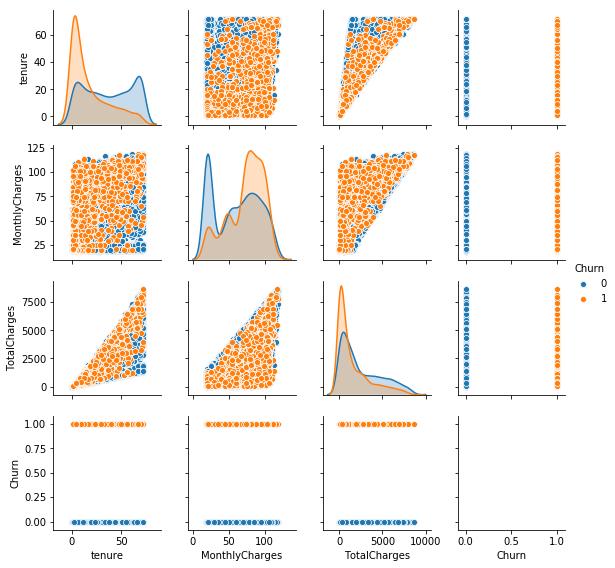

In [11]:
col = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
sns.pairplot(df[col], hue="Churn", size=2);

## check outlier Numerical variable

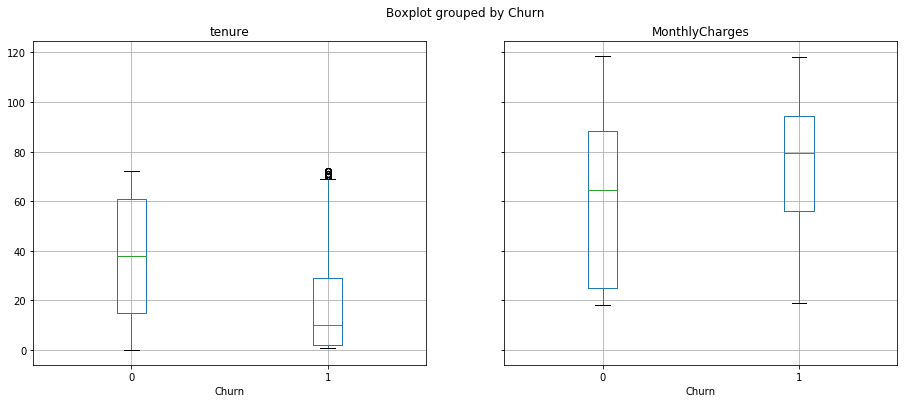

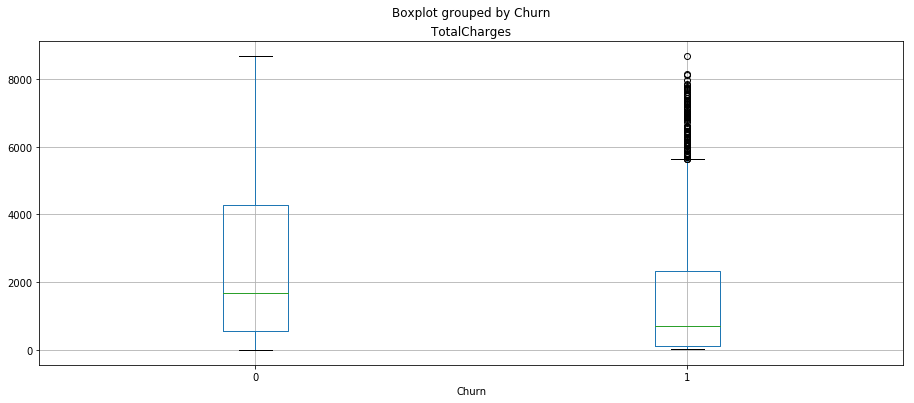

In [12]:
boxplot = df.boxplot(figsize=(15,6), column=['tenure', 'MonthlyCharges'], by="Churn", layout=(1, 2))
boxplot = df.boxplot(figsize=(15,6), column=['TotalCharges'], by="Churn")

The  tenure and Total  charge column with the values of churn equal 1 have a outlier. 

## Change the outlier in a median values

In [13]:
#Capping the outlier rows with Percentiles
def detOutlier(data, column):

    Q1_Income = data[column].quantile(0.25)
    Q3_Income = data[column].quantile(0.75)
    IQR_Income = Q3_Income  - Q1_Income
    upper_Income = Q3_Income + 1.5 * IQR_Income
    lower_Income = Q1_Income - 1.5 * IQR_Income
    
    data[column].loc[(data[column] > upper_Income)] = np.median(data[column]) 
    data[column].loc[(data[column] < lower_Income)] = np.median(data[column])
    
    return data

outlier = ["TotalCharges", "tenure"]
for c in outlier:
    data_train1 = detOutlier(df[df["Churn"]==0], c)
    df = data_train1.append(detOutlier(df[df["Churn"]==1], c))

#df = shuffle(df)

## Correlation Matrix

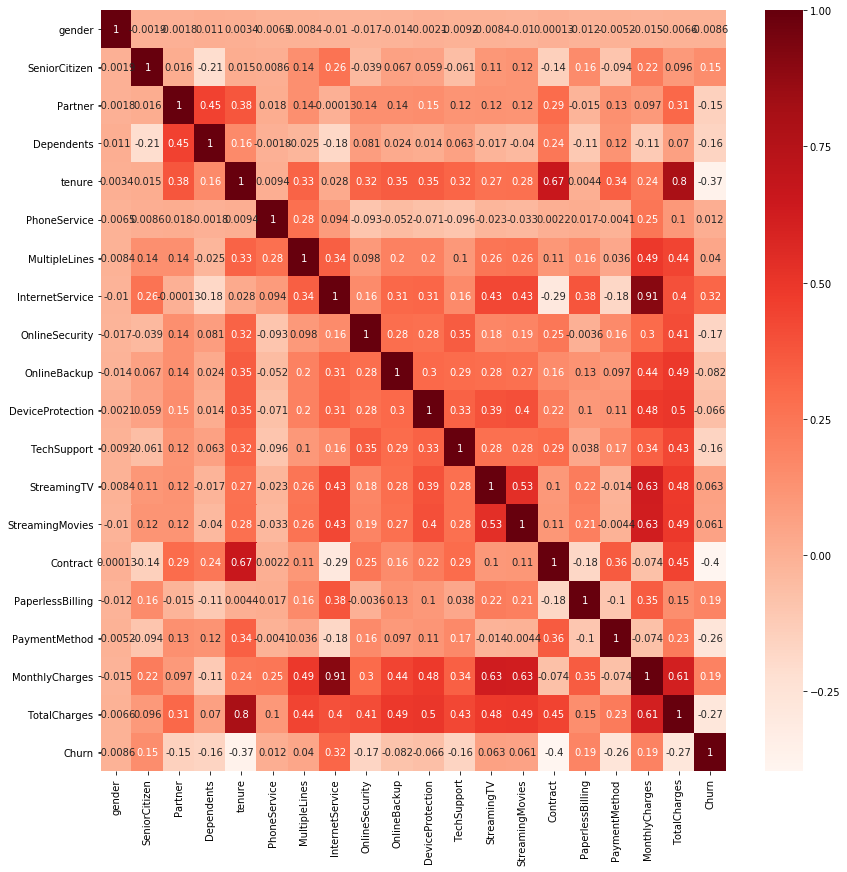

In [14]:
plt.figure(figsize=(14,14))

corr = df.corr(method='pearson')

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

According to the correlation matrix, most columns do not have linear relationships to the churn label

## Create and Tune our Model Classification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn import preprocessing
import pickle
from sklearn.utils import shuffle
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

column = list(df.columns.values)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Xgboost with Grid Search

In [16]:
column = list(df.columns.values)

colUsed = column[1:-1]

X = df[colUsed] #features
y = df["Churn"] #target

grid_params = {
               'learning_rate':[0.01, 0.1],
               'eta':[0.01],
               'min_child_weight':[5, 7, 8],
               'max_depth':[3, 4, 5, 7],
               'n_estimators':[100, 115]}

gs = GridSearchCV(
                  xgb.XGBClassifier(),
                  grid_params,
                  verbose=1,
                  cv=5,
                  n_jobs=-1)
# fit model

res = gs.fit(X, y)

print(res.best_score_) #best score train
print(res.best_params_) #best parameters

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   49.9s finished


0.821098963509868
{'eta': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}


### The result after run Grid Search 
Acuuracy: 0.82 <br>
Best parameters
{'eta': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100}

## Split data set on train/test and train it with the our best parameters

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
print("data splited")

data splited


accuracy xgboost TR: 0.837
accuracy xgboost TS: 0.816
Normalized confusion matrix
[[0.90919128 0.09080872]
 [0.36495792 0.63504208]]
Normalized confusion matrix
[[0.89555126 0.10444874]
 [0.40391459 0.59608541]]


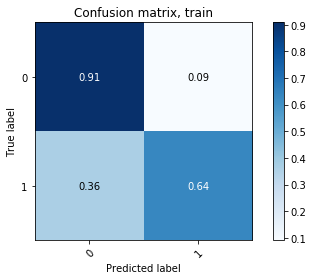

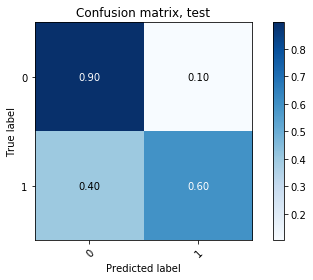

In [18]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.1, eta= 0.01, max_depth= 3, min_child_weight= 7)
                              
xgb_model.fit(x_train, y_train)
                              
y_pred_train = xgb_model.predict(x_train)
                              
y_pred_test = xgb_model.predict(x_test)
                              
print("accuracy xgboost TR:",np.round(accuracy_score(y_train, y_pred_train), 3))
print("accuracy xgboost TS:",np.round(accuracy_score(y_test, y_pred_test), 3))
                              
plot_confusion_matrix(y_train, y_pred_train,classes=[0, 1],
                      title='Confusion matrix, train', normalize=True)

plot_confusion_matrix(y_test, y_pred_test,classes=[0, 1],
                      title='Confusion matrix, test', normalize=True)                              

# Tuning Model
### 1- Features selection
### 2- Normalization features
### 3- Applied Over Sampling

<BarContainer object of 19 artists>

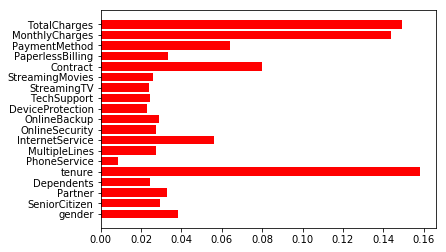

In [19]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

df = pd.read_csv(path_data+"dataset-churn-mapped.csv")

model = ExtraTreesClassifier()

col_features = list(df.columns[1:-1].values)

X = df[col_features]

y = df["Churn"]

model = model.fit(X, y)

# display the relative importance of each attribute
importances = model.feature_importances_

plt.barh(col_features, importances, color="r",align="center")

In [20]:
outlier = ["TotalCharges", "tenure"]
for c in outlier:
    data_train1 = detOutlier(df[df["Churn"]==0], c)
    df = data_train1.append(detOutlier(df[df["Churn"]==1], c))

## Applied Over Sapling

In [21]:
from imblearn.over_sampling import SMOTE

#the best features
colUsed = ["TotalCharges", "MonthlyCharges", "PaymentMethod", "PaperlessBilling", "Contract", "StreamingMovies",
            "StreamingTV", "TechSupport", "DeviceProtection", "OnlineSecurity", "InternetService", "MultipleLines",
            "PhoneService", "tenure", "Dependents", "Partner", "SeniorCitizen", "gender"]

X = df[colUsed]
scaler = preprocessing.Normalizer()
X = scaler.fit_transform(X)
y = df["Churn"]

#applied smote
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)

x_data, y_data = smote.fit_sample(df[colUsed], df["Churn"])

x_data.shape, y_data.shape

Using TensorFlow backend.


((10348, 18), (10348,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=None)

print("data splited")

data splited


## Train with same parameters that above

accuracy xgboost TR: 0.885
accuracy xgboost TS: 0.866
Normalized confusion matrix
[[0.87878788 0.12121212]
 [0.10921788 0.89078212]]
Normalized confusion matrix
[[0.86300463 0.13699537]
 [0.13111669 0.86888331]]


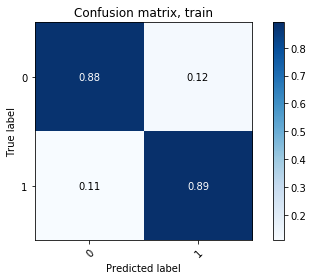

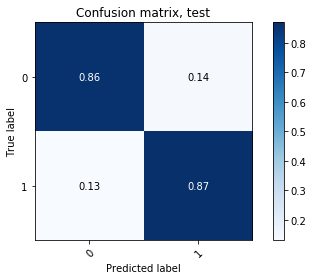

In [23]:

xgb_model = xgb.XGBClassifier(learning_rate= 0.1, eta= 0.01, max_depth= 3, min_child_weight= 7)
    
xgb_model.fit(x_train, y_train)
                              
y_pred_train = xgb_model.predict(x_train)
                              
y_pred_test = xgb_model.predict(x_test)
                              
print("accuracy xgboost TR:",np.round(accuracy_score(y_train, y_pred_train), 3))
print("accuracy xgboost TS:",np.round(accuracy_score(y_test, y_pred_test), 3))
                              
plot_confusion_matrix(y_train, y_pred_train,classes=[0, 1],
                      title='Confusion matrix, train', normalize=True)

plot_confusion_matrix(y_test, y_pred_test,classes=[0, 1],
                      title='Confusion matrix, test', normalize=True)          

* Using the same xgboost parameters as before, the result (Accuracy / Confusion Matrix) was improved by more than 5%, and the test data by about 86%, which augurs well for the future.
* There are still many options for optimizing our model such as continuing grid search by setting broader values and will be tightened as treatment progresses, it's also posible to improving the class repair in training and test data, for example.